# ***Objective***
The objective of this project is to develop a predictive model that accurately estimates the selling price of a car based on various features such as the year, present price, kilometers driven, fuel type, selling type, transmission type, and ownership history. By leveraging advanced machine learning algorithms, this project aims to provide an efficient and reliable tool for potential car buyers and sellers to make informed decisions. The ultimate goal is to enhance the transparency and efficiency of the used car market, thereby facilitating fair pricing and smoother transactions.

# ***Data Collection***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
car = pd.read_csv('car data.csv')
car

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
car.shape

(301, 9)

In [6]:
car.sample(3)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
12,ciaz,2015,7.50,9.94,15000,Petrol,Dealer,Automatic,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
248,i10,2013,4.00,4.60,30000,Petrol,Dealer,Manual,0


In [7]:
car.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
car['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [10]:
car['Selling_type'].value_counts()

Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64

In [11]:
car['Transmission'].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [12]:
car['Owner'].value_counts()

Owner
0    290
1     10
3      1
Name: count, dtype: int64

# ***Data Cleaning***

In [14]:
car.isnull().mean()

Car_Name         0.0
Year             0.0
Selling_Price    0.0
Present_Price    0.0
Driven_kms       0.0
Fuel_Type        0.0
Selling_type     0.0
Transmission     0.0
Owner            0.0
dtype: float64

In [16]:
car['Fuel_Type'] = car['Fuel_Type'].map({'Petrol':0,'Diesel':1,'CNG':2})
car['Selling_type'] = car['Selling_type'].map({'Dealer':0,'Individual':1})
car['Transmission'] = car['Transmission'].map({'Manual':0,'Automatic':1})

In [17]:
print(car['Fuel_Type'].value_counts())
print(car['Selling_type'].value_counts())
print(car['Transmission'].value_counts())

Fuel_Type
0    239
1     60
2      2
Name: count, dtype: int64
Selling_type
0    195
1    106
Name: count, dtype: int64
Transmission
0    261
1     40
Name: count, dtype: int64


# ***Data Visualization***

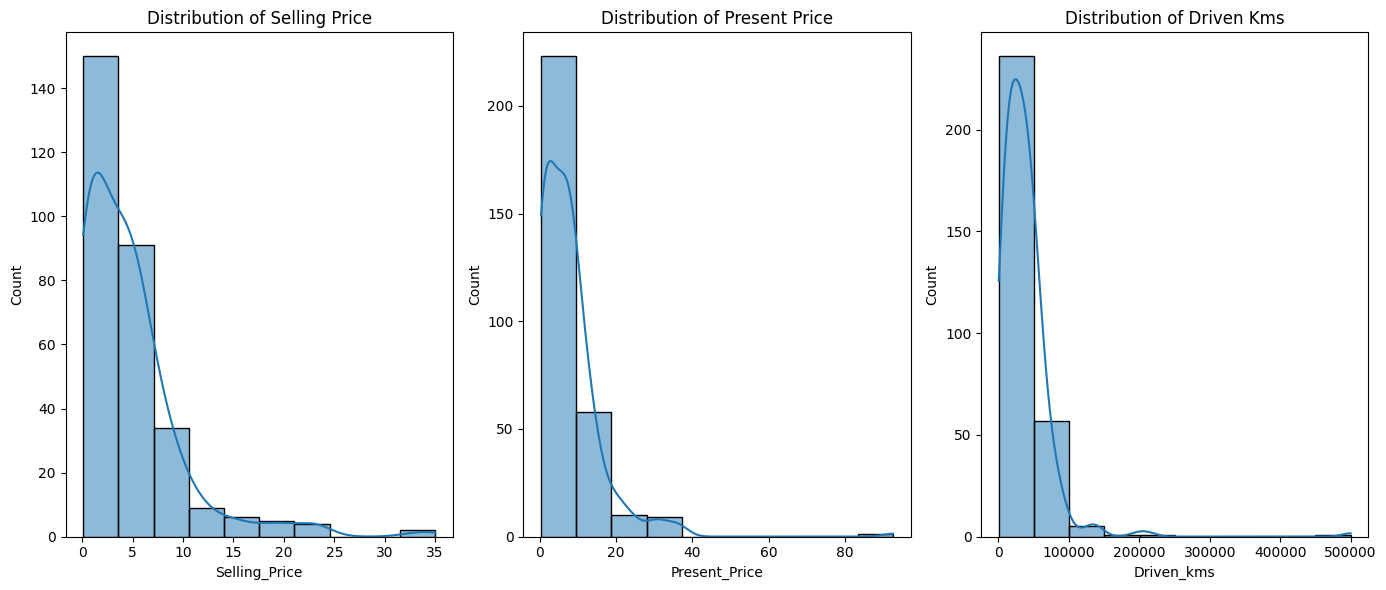

In [18]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
sns.histplot(car['Selling_Price'], kde=True, bins=10)
plt.title('Distribution of Selling Price')

plt.subplot(1, 3, 2)
sns.histplot(car['Present_Price'], kde=True, bins=10)
plt.title('Distribution of Present Price')

plt.subplot(1, 3, 3)
sns.histplot(car['Driven_kms'], kde=True, bins=10)
plt.title('Distribution of Driven Kms')

plt.tight_layout()
plt.show()


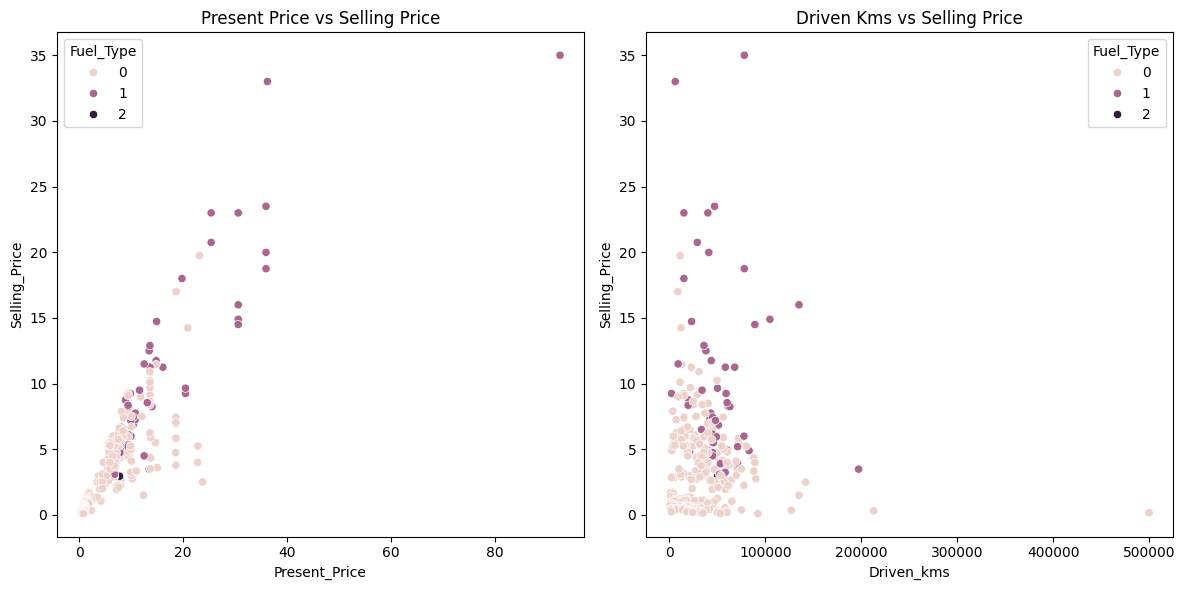

In [19]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Present_Price', y='Selling_Price', data=car, hue='Fuel_Type')
plt.title('Present Price vs Selling Price')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Driven_kms', y='Selling_Price', data=car, hue='Fuel_Type')
plt.title('Driven Kms vs Selling Price')

plt.tight_layout()
plt.show()

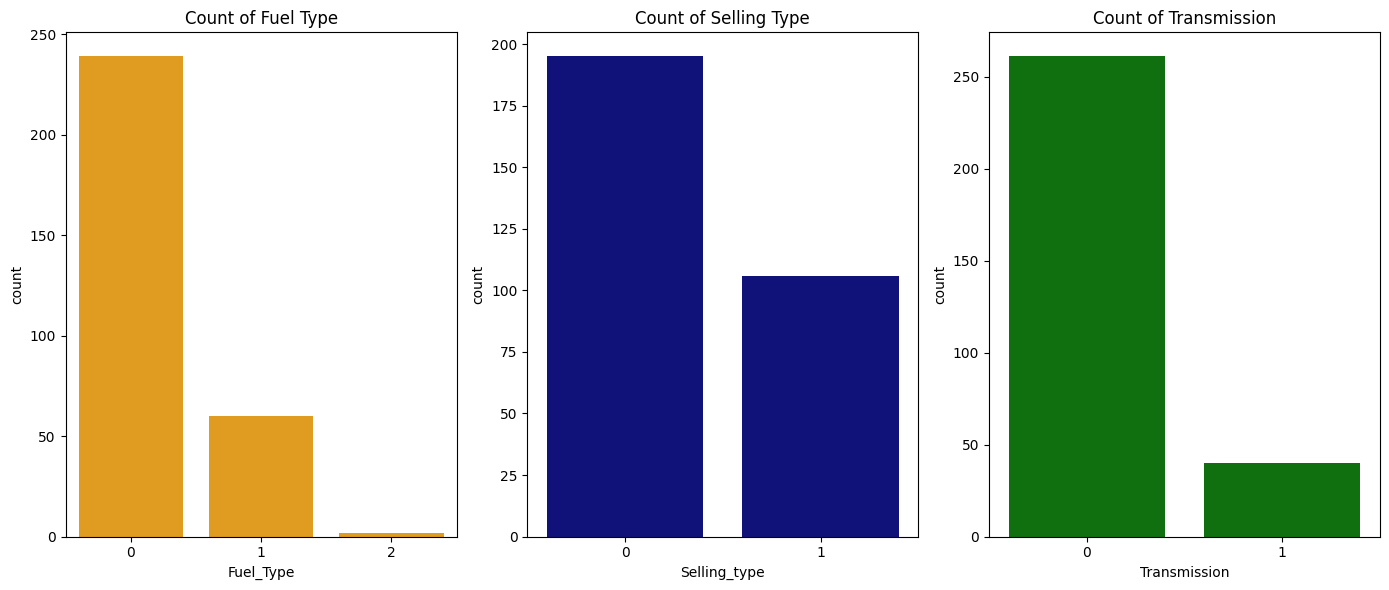

In [38]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
sns.countplot(x='Fuel_Type', data=car, color='orange')
plt.title('Count of Fuel Type')

plt.subplot(1, 3, 2)
sns.countplot(x='Selling_type', data=car, color='darkblue')
plt.title('Count of Selling Type')

plt.subplot(1, 3, 3)
sns.countplot(x='Transmission', data=car, color='green')
plt.title('Count of Transmission')

plt.tight_layout()
plt.show()

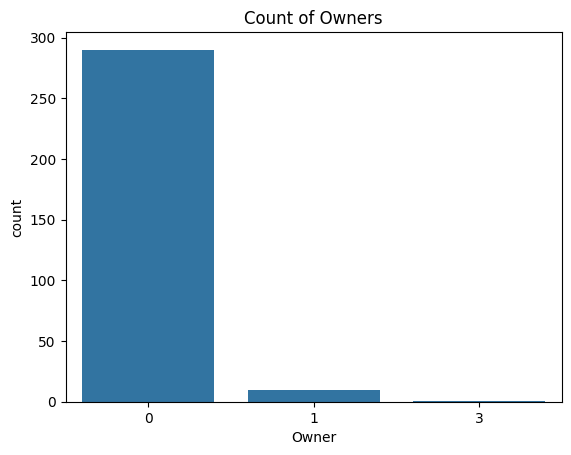

In [22]:
sns.countplot(x='Owner', data=car)
plt.title('Count of Owners')
plt.show()

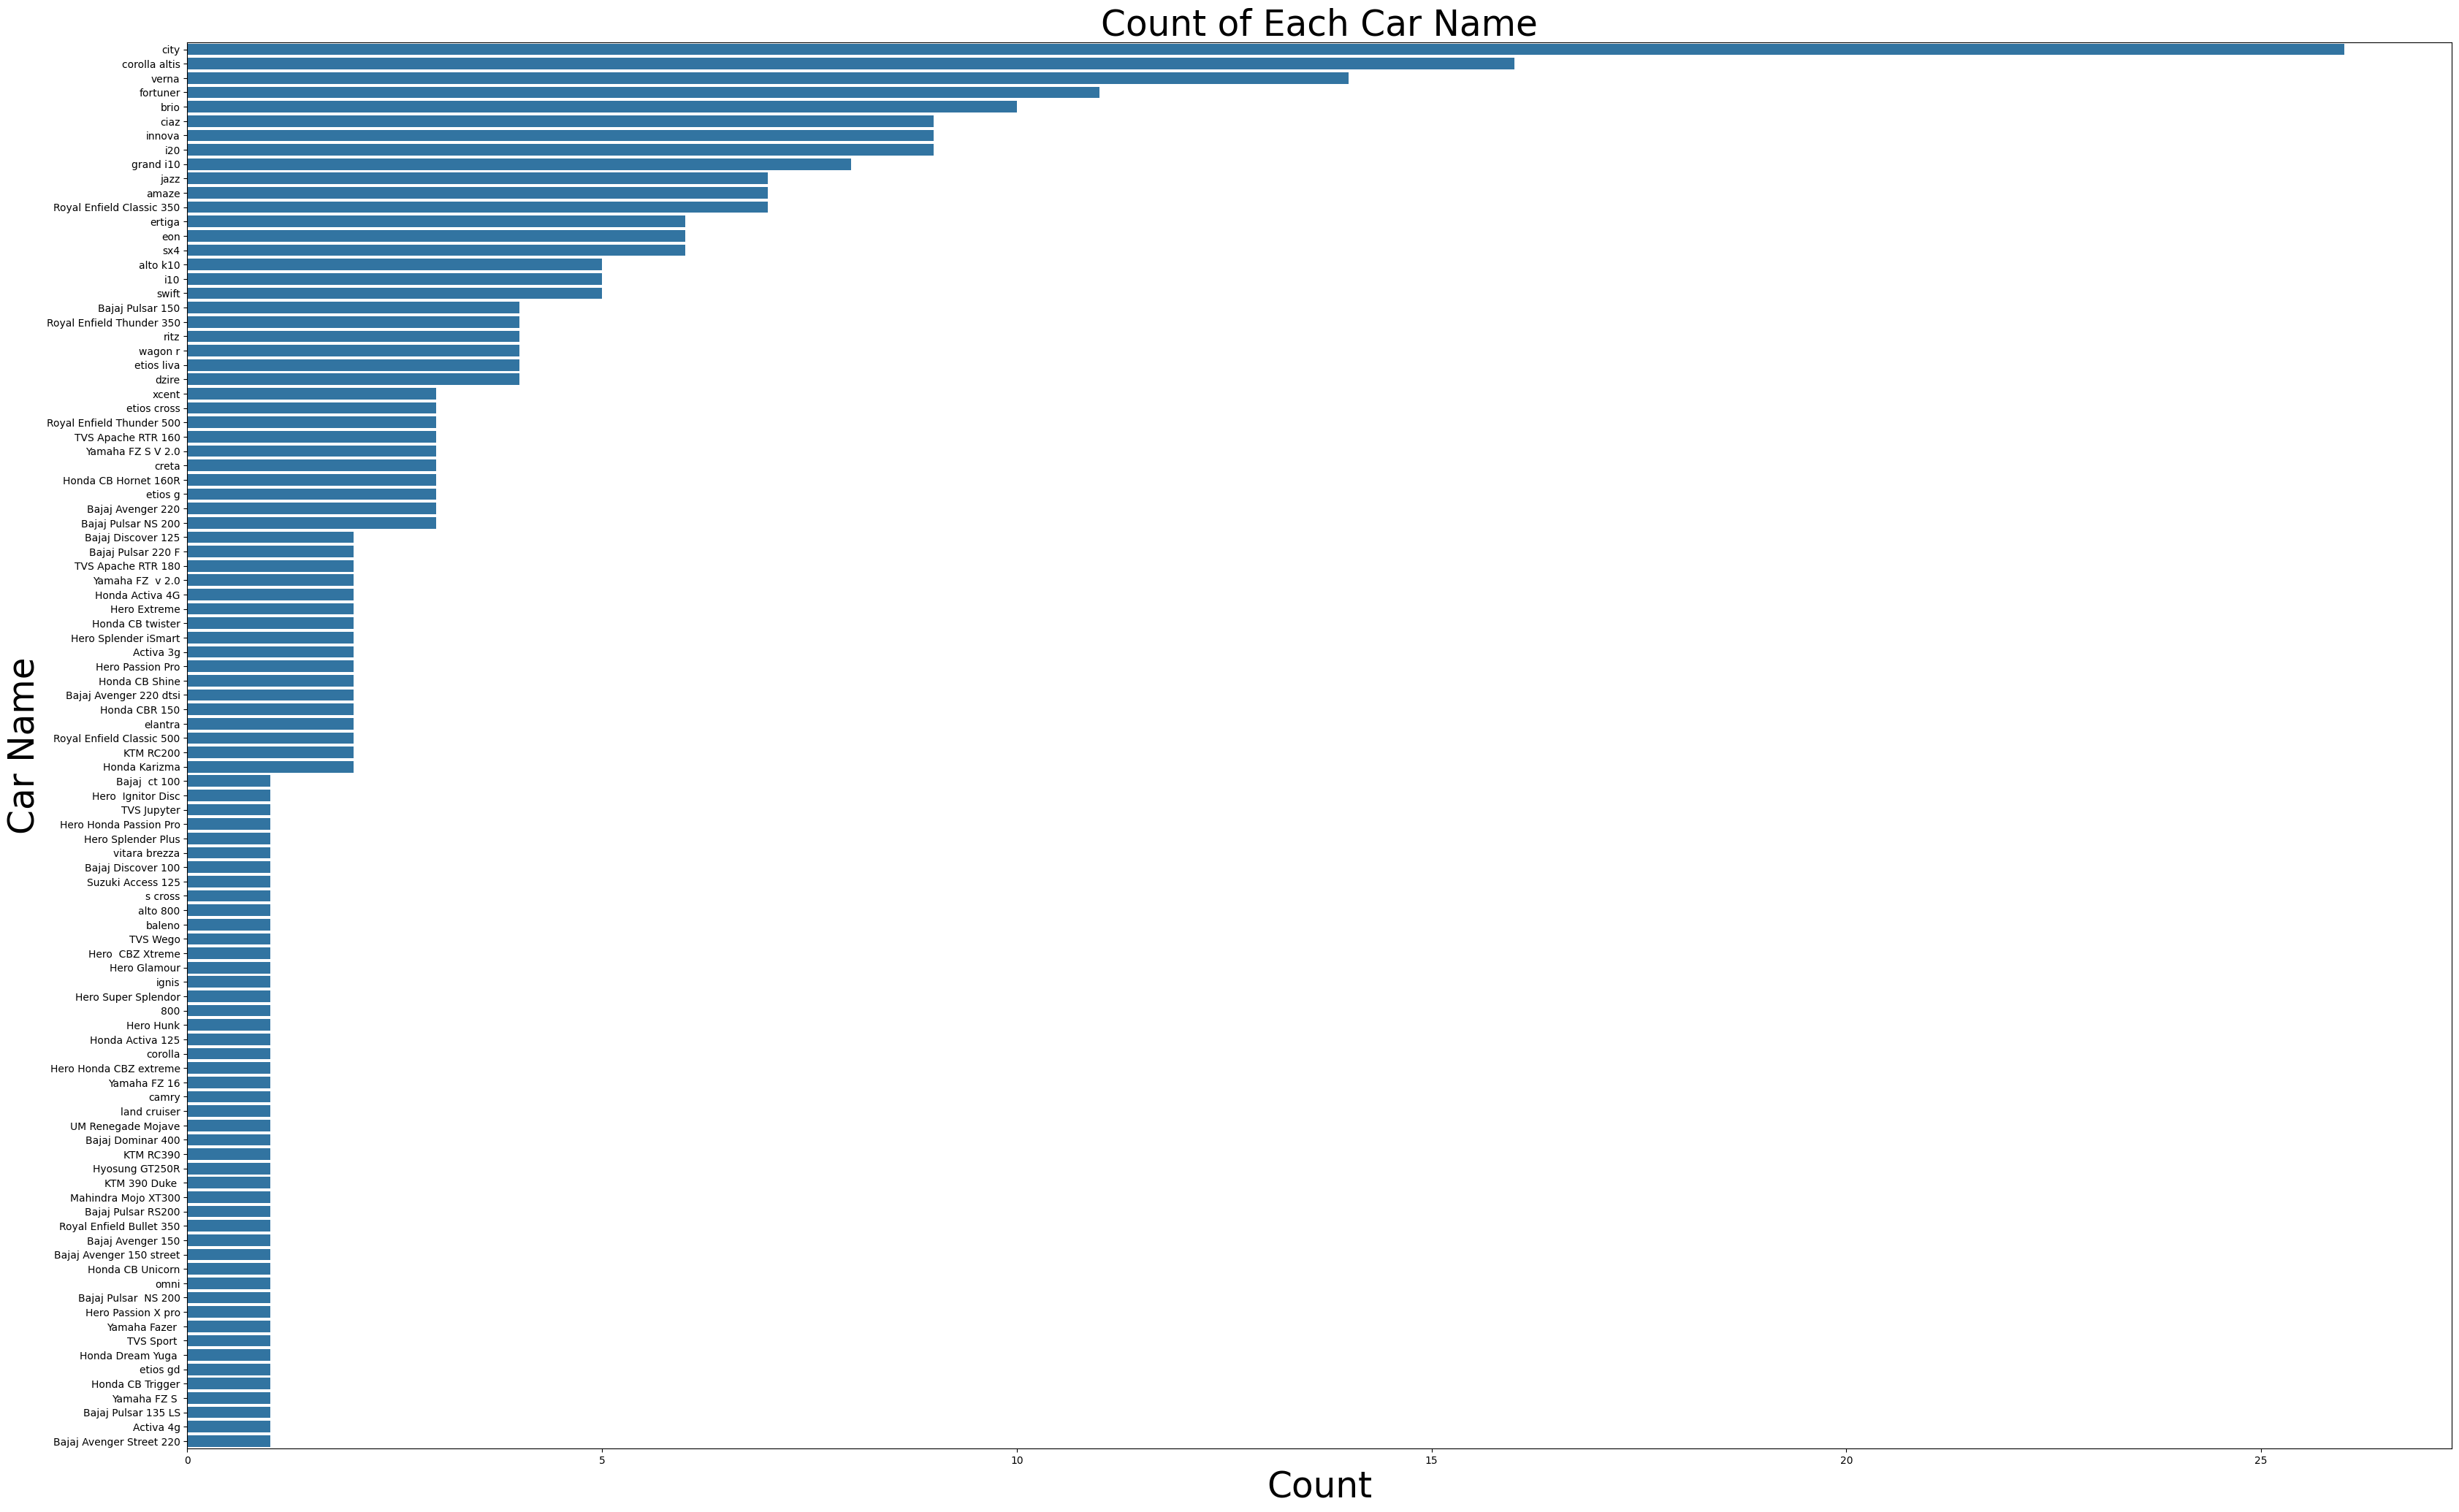

In [36]:
plt.figure(figsize=(40, 25))
sns.countplot(y='Car_Name', data=car, order=car['Car_Name'].value_counts().index)
plt.title('Count of Each Car Name', fontsize=35)
plt.xlabel('Count', fontsize=35)
plt.ylabel('Car Name', fontsize=35)
plt.show()

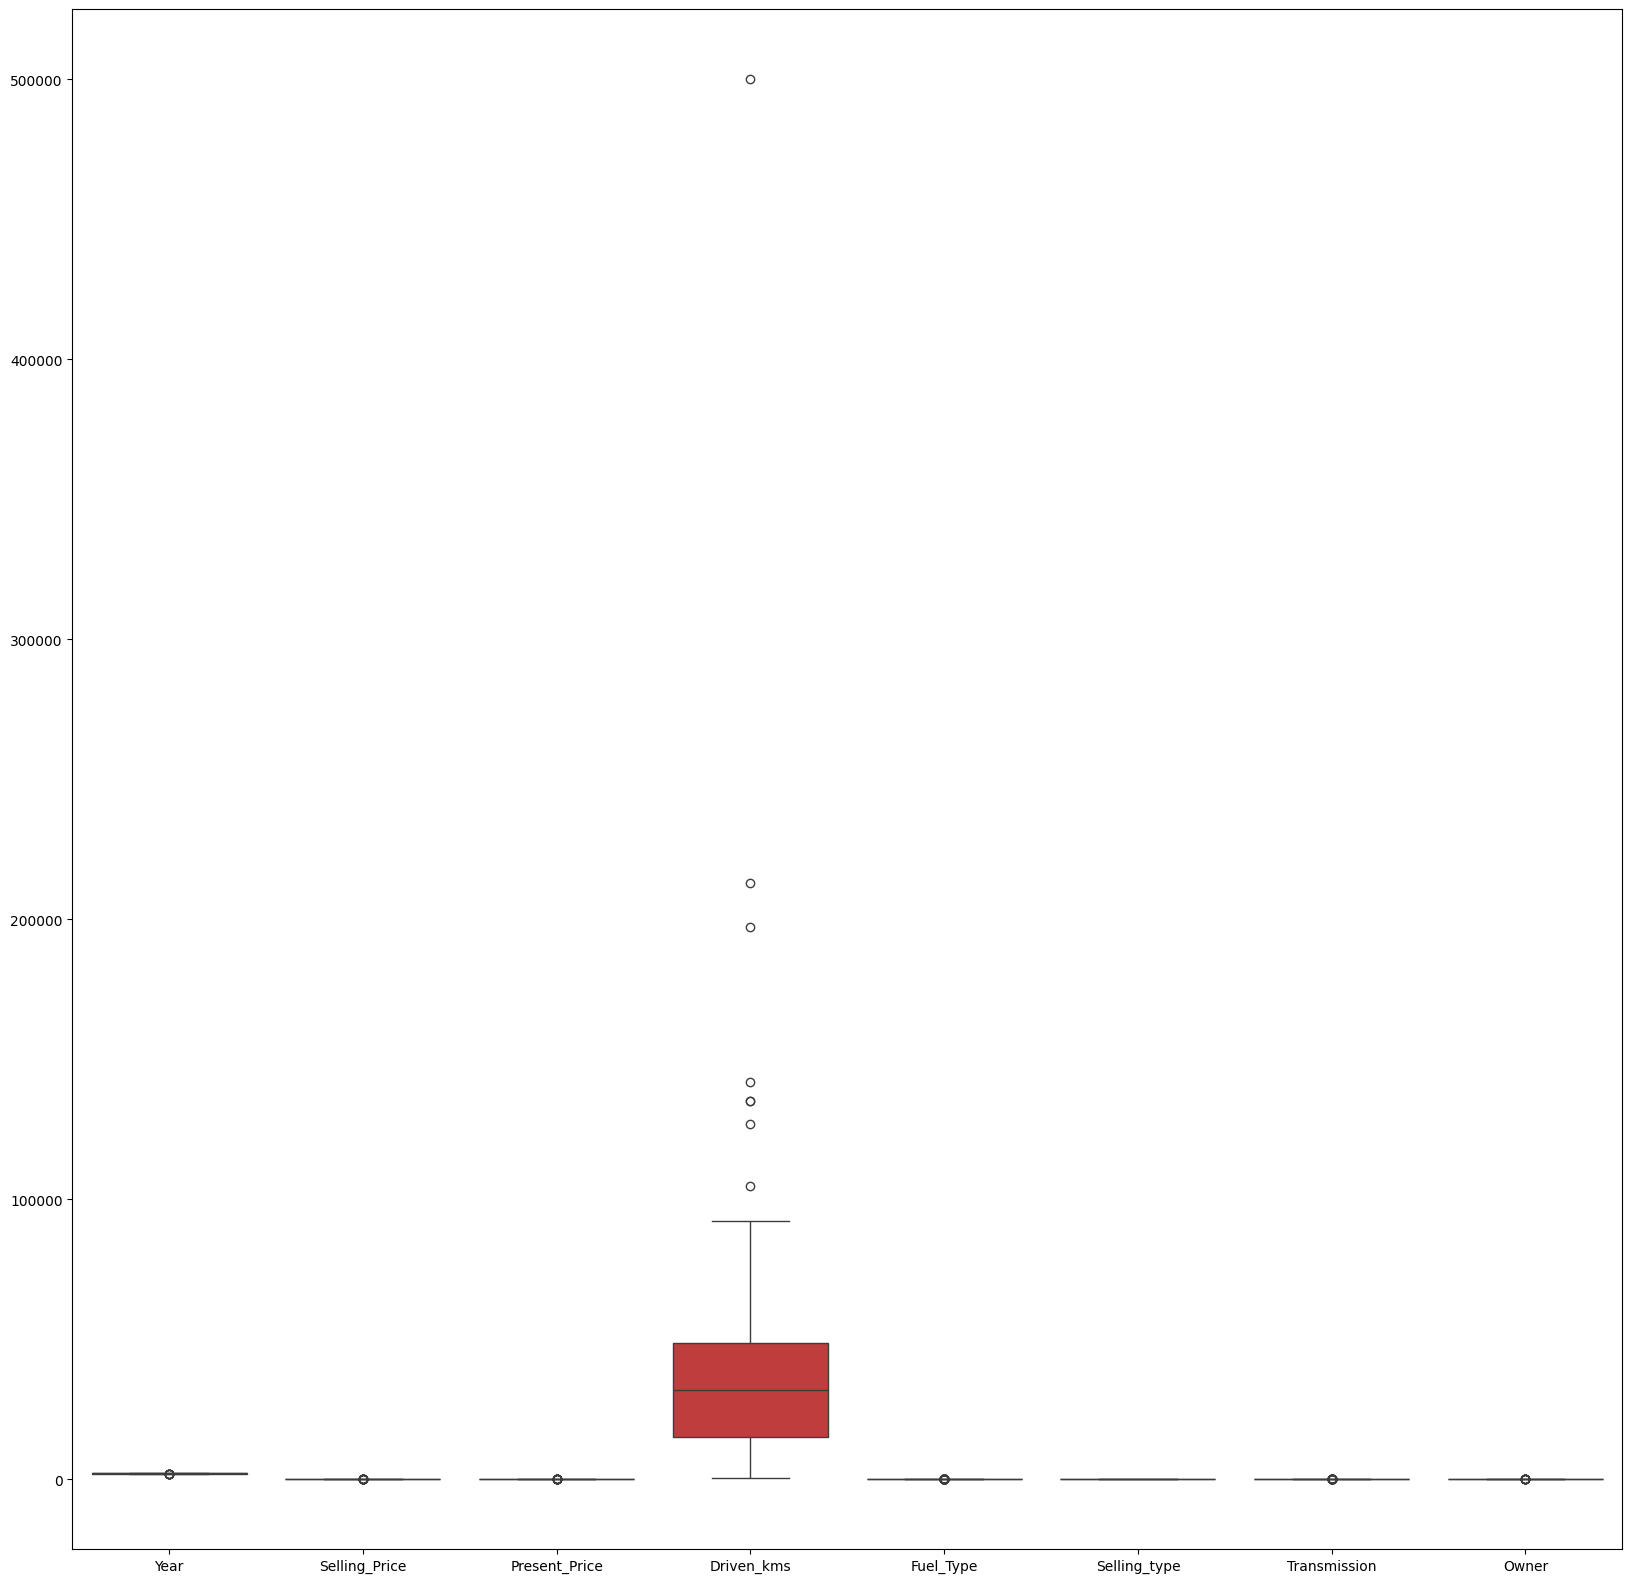

In [44]:
plt.figure(figsize=(20,20))
sns.boxplot(car)
plt.show()

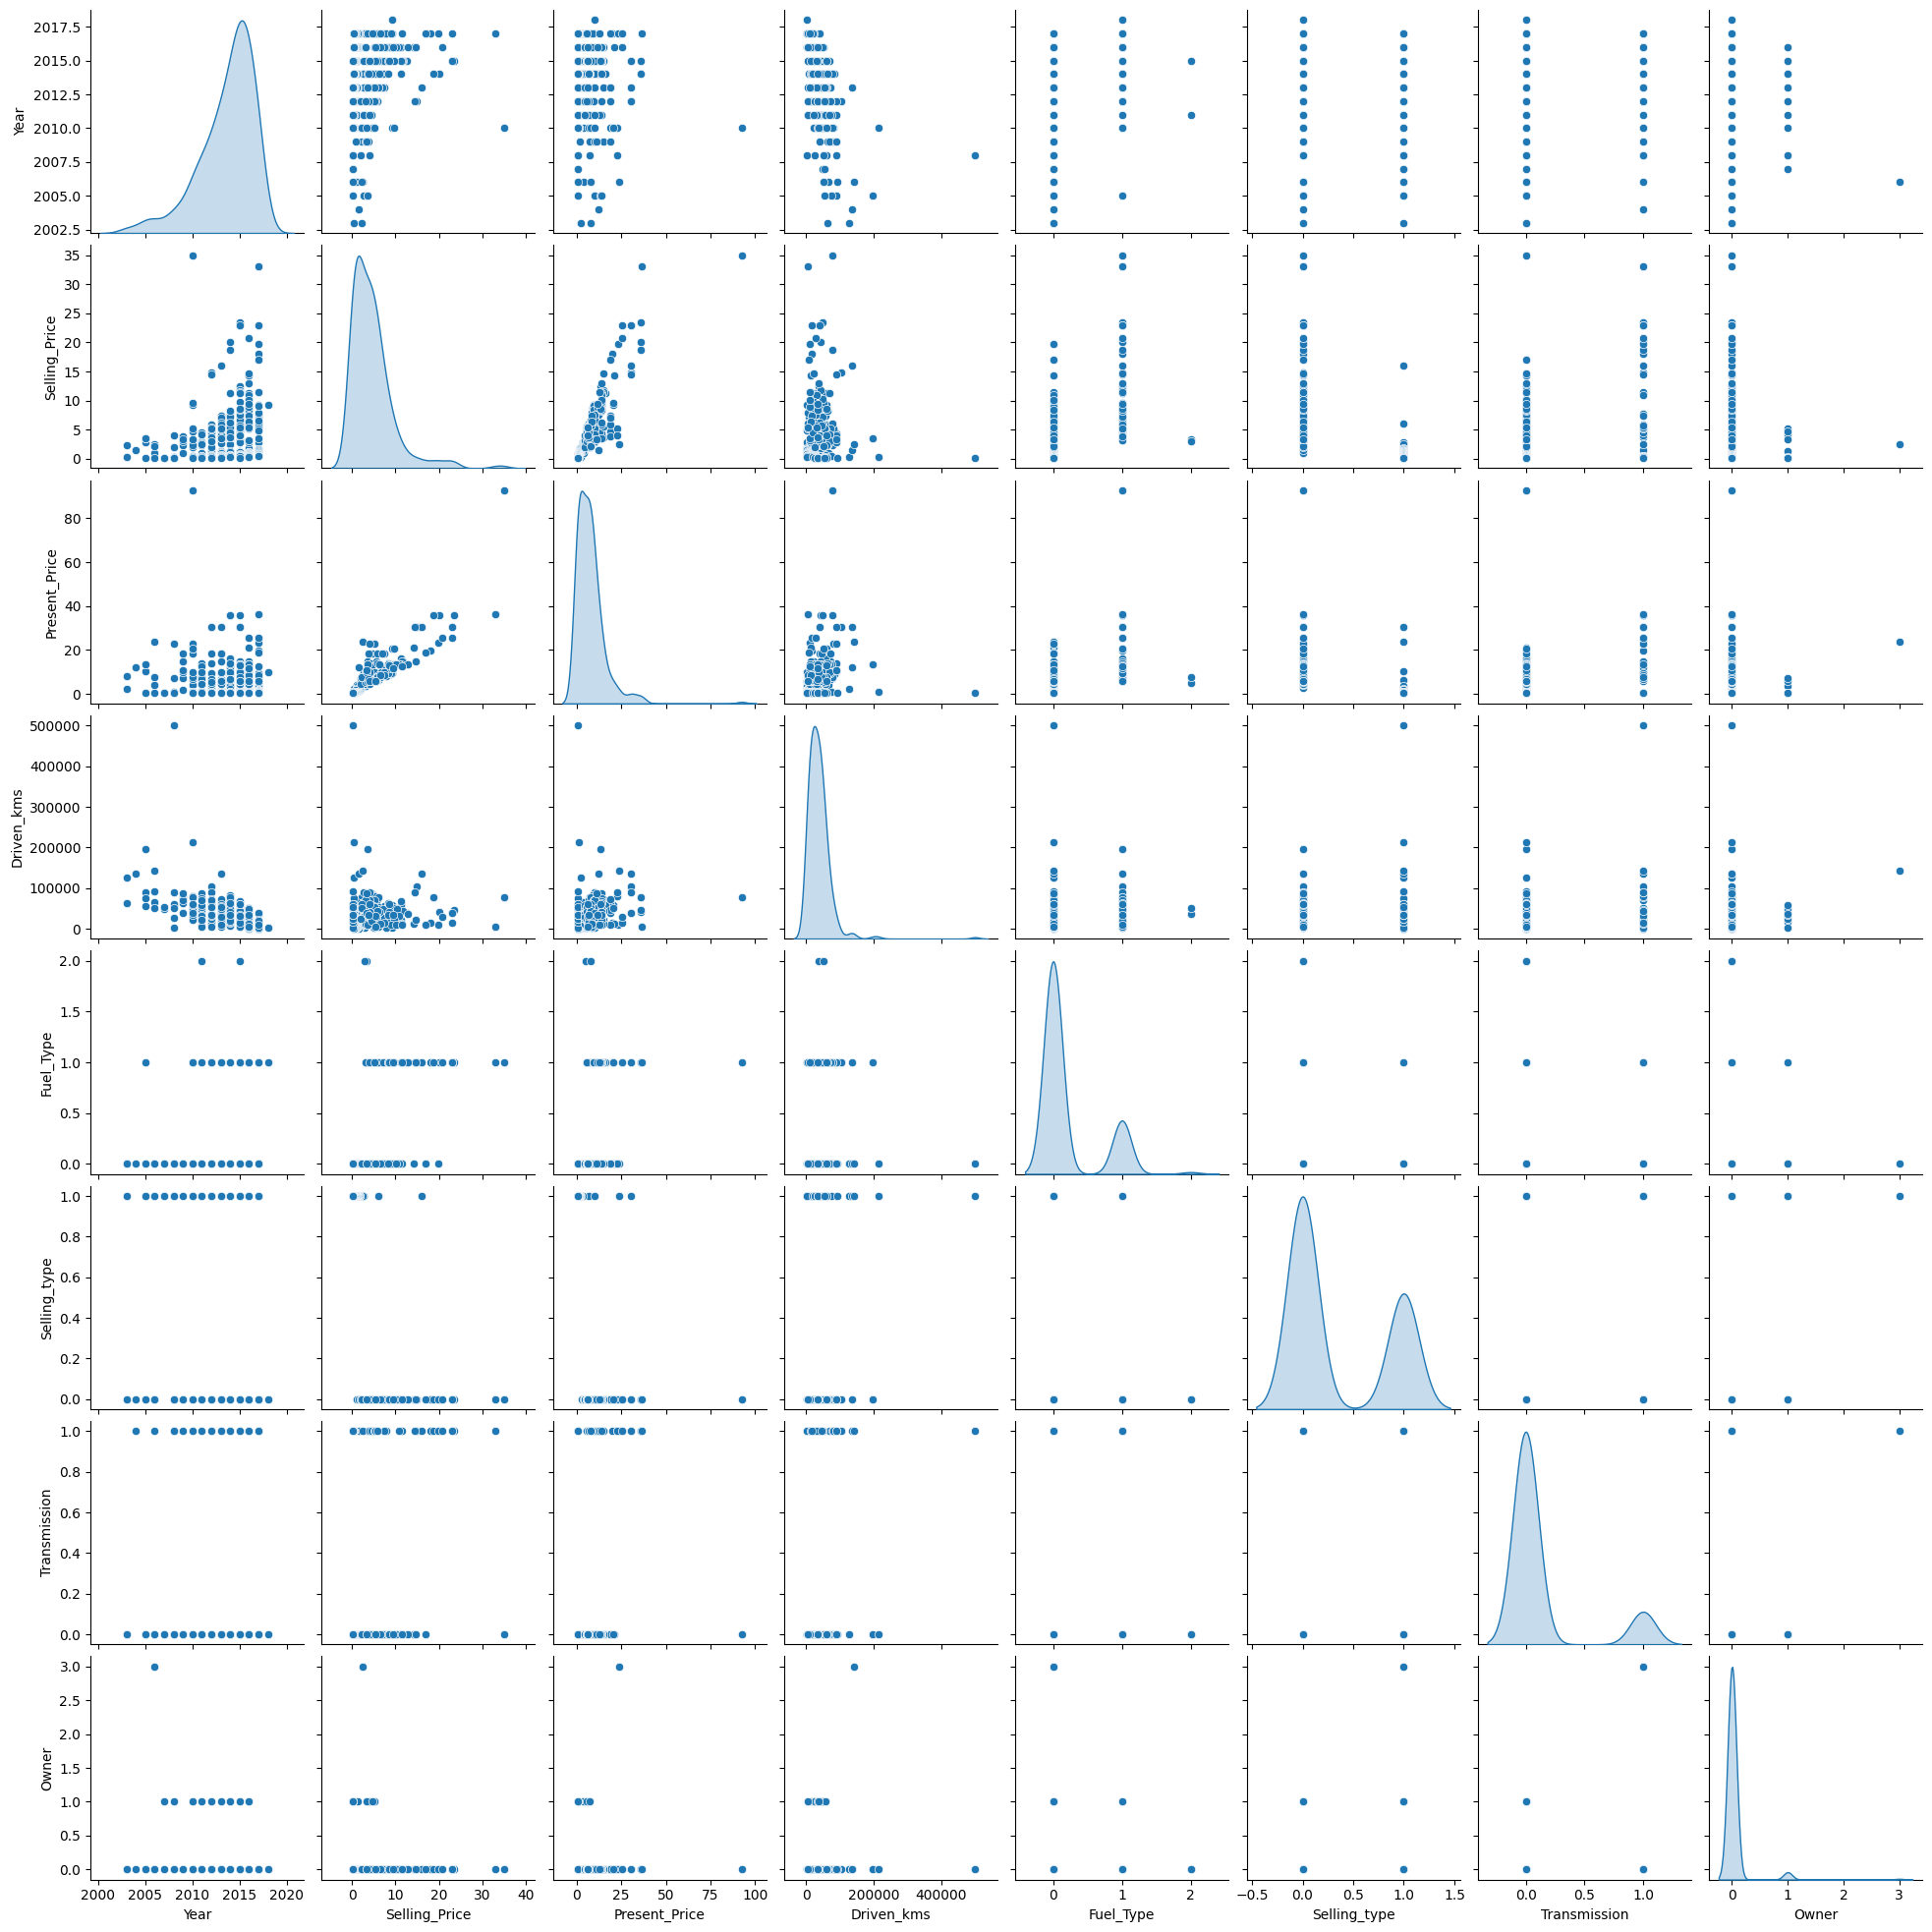

In [24]:
sns.pairplot(car, diag_kind='kde')
plt.show()

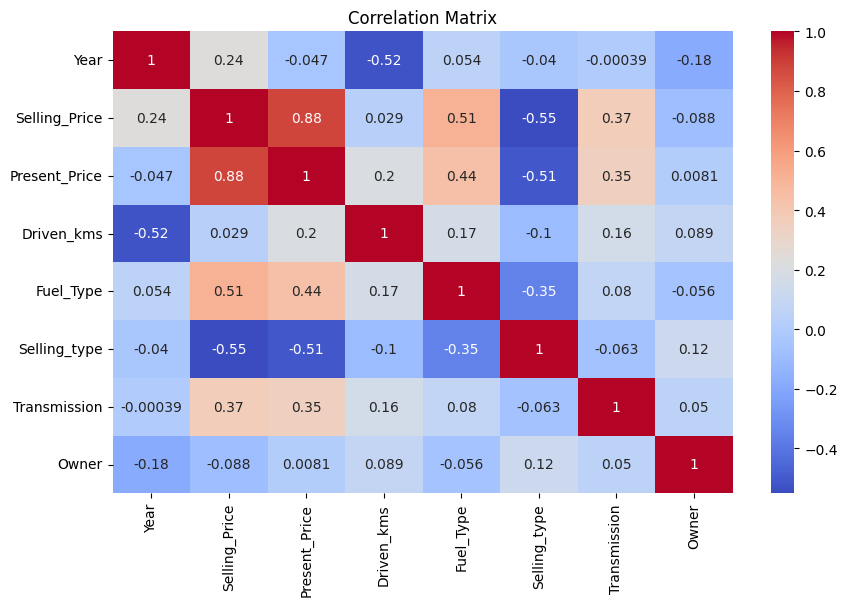

In [28]:
df = car.drop(['Car_Name'], axis=1)
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# ***Model building***

In [39]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df[['Driven_kms']] = ss.fit_transform(df[['Driven_kms']])

In [40]:
df

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,-0.256224,0,0,0,0
1,2013,4.75,9.54,0.155911,1,0,0,0
2,2017,7.25,9.85,-0.773969,0,0,0,0
3,2011,2.85,4.15,-0.817758,0,0,0,0
4,2014,4.60,6.87,0.141743,1,0,0,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,-0.076225,1,0,0,0
297,2015,4.00,5.90,0.593804,0,0,0,0
298,2009,3.35,11.00,1.313340,0,0,0,0
299,2017,11.50,12.50,-0.719876,1,0,0,0


In [41]:
X = car.drop(['Car_Name','Selling_Price'], axis=1)
y = car['Selling_Price']

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [48]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred1 = lr.predict(X_test)

In [50]:
mse_lr = mean_squared_error(y_test, y_pred1)
mae_lr = mean_absolute_error(y_test, y_pred1)
rmse_lr = mean_squared_error(y_test, y_pred1, squared=False)
r2_lr = r2_score(y_test, y_pred1)

In [52]:
print('Linear Regression:')
print(f'Mean Squared Error (MSE): {mse_lr}')
print(f'Mean Absolute Error (MAE): {mae_lr}')
print(f'Root Mean Squared Error (RMSE): {rmse_lr}')
print(f'R-squared (R2): {r2_lr}')

Linear Regression:
Mean Squared Error (MSE): 3.4334172176582514
Mean Absolute Error (MAE): 1.233097409481754
Root Mean Squared Error (RMSE): 1.8529482501295742
R-squared (R2): 0.8750316926133195


In [53]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred2 = dtr.predict(X_test)

In [54]:
mse_dtr = mean_squared_error(y_test, y_pred2)
mae_dtr = mean_absolute_error(y_test, y_pred2)
rmse_dtr = mean_squared_error(y_test, y_pred2, squared=False)
r2_dtr = r2_score(y_test, y_pred2)

In [55]:
print("Decision Tree Regression:")
print(f'Mean Squared Error (MSE): {mse_dtr}')
print(f'Mean Absolute Error (MAE): {mae_dtr}')
print(f'Root Mean Squared Error (RMSE): {rmse_dtr}')
print(f'R-squared (R2): {r2_dtr}')

Decision Tree Regression:
Mean Squared Error (MSE): 1.5201197368421053
Mean Absolute Error (MAE): 0.7598684210526315
Root Mean Squared Error (RMSE): 1.2329313593392397
R-squared (R2): 0.9446712186444355


In [61]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(X_train, y_train)
y_pred3 = rfr.predict(X_test)

In [62]:
mse_rfr = mean_squared_error(y_test, y_pred3)
mae_rfr = mean_absolute_error(y_test, y_pred3)
rmse_rfr = mean_squared_error(y_test, y_pred3, squared=False)
r2_rfr = r2_score(y_test, y_pred3)

In [63]:
print("Random Forest Regression:")
print(f'Mean Squared Error (MSE): {mse_rfr}')
print(f'Mean Absolute Error (MAE): {mae_rfr}')
print(f'Root Mean Squared Error (RMSE): {rmse_rfr}')
print(f'R-squared (R2): {r2_rfr}')

Random Forest Regression:
Mean Squared Error (MSE): 0.9960576644736843
Mean Absolute Error (MAE): 0.631005263157895
Root Mean Squared Error (RMSE): 0.9980268856467166
R-squared (R2): 0.9637458448834527


In [64]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
xgb_model.fit(X_train, y_train)
y_pred4 = xgb_model.predict(X_test)

In [65]:
mse_xgb = mean_squared_error(y_test, y_pred4)
mae_xgb = mean_absolute_error(y_test, y_pred4)
rmse_xgb = mean_squared_error(y_test, y_pred4, squared=False)
r2_xgb = r2_score(y_test, y_pred4)

In [66]:
print("XGBoost Regression:")
print(f'Mean Squared Error (MSE): {mse_xgb}')
print(f'Mean Absolute Error (MAE): {mae_xgb}')
print(f'Root Mean Squared Error (RMSE): {rmse_xgb}')
print(f'R-squared (R2): {r2_xgb}')

XGBoost Regression:
Mean Squared Error (MSE): 0.8114896599088218
Mean Absolute Error (MAE): 0.5689183858272276
Root Mean Squared Error (RMSE): 0.9008272086858955
R-squared (R2): 0.9704636859339323


In [67]:
metrics = {
    "Model": ["Linear Regression", "Decision Tree Regression", "Random Forest Regression", "XGBoost Regression"],
    "Mean Squared Error": [mse_lr, mse_dtr, mse_rfr, mse_xgb],
    "Mean Absolute Error": [mae_lr, mae_dtr, mae_rfr, mae_xgb],
    "Root MSE": [rmse_lr, rmse_dtr, rmse_rfr, rmse_xgb],
    "R-Squared": [r2_lr, r2_dtr, r2_rfr, r2_xgb]
}

# Convert the dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics)

# Print the DataFrame
print(metrics_df)

                      Model  Mean Squared Error  Mean Absolute Error  \
0         Linear Regression            3.433417             1.233097   
1  Decision Tree Regression            1.520120             0.759868   
2  Random Forest Regression            0.996058             0.631005   
3        XGBoost Regression            0.811490             0.568918   

   Root MSE  R-Squared  
0  1.852948   0.875032  
1  1.232931   0.944671  
2  0.998027   0.963746  
3  0.900827   0.970464  


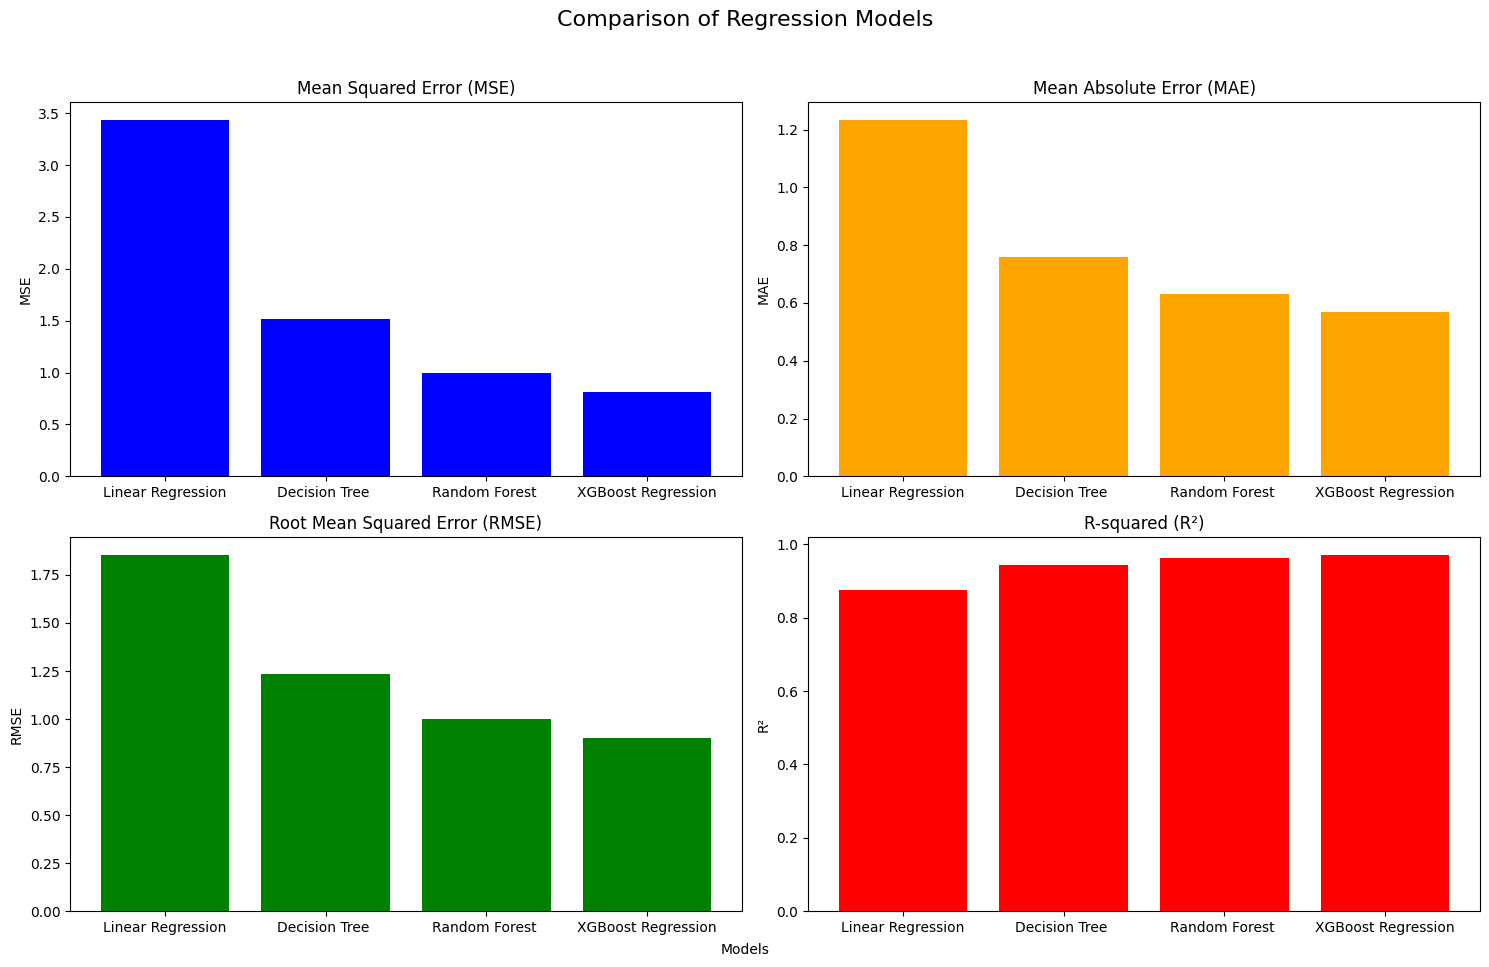

In [68]:
# Define the metrics for each model
models = ["Linear Regression", "Decision Tree ", "Random Forest ", "XGBoost Regression"]
mse = [mse_lr, mse_dtr, mse_rfr, mse_xgb]
mae = [mae_lr, mae_dtr, mae_rfr, mae_xgb]
rmse = [rmse_lr, rmse_dtr, rmse_rfr, rmse_xgb]
r2 = [r2_lr, r2_dtr, r2_rfr, r2_xgb]

# Plotting the metrics
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# MSE
axs[0, 0].bar(models, mse, color='blue')
axs[0, 0].set_title('Mean Squared Error (MSE)')
axs[0, 0].set_ylabel('MSE')

# MAE
axs[0, 1].bar(models, mae, color='orange')
axs[0, 1].set_title('Mean Absolute Error (MAE)')
axs[0, 1].set_ylabel('MAE')

# RMSE
axs[1, 0].bar(models, rmse, color='green')
axs[1, 0].set_title('Root Mean Squared Error (RMSE)')
axs[1, 0].set_ylabel('RMSE')

# R²
axs[1, 1].bar(models, r2, color='red')
axs[1, 1].set_title('R-squared (R²)')
axs[1, 1].set_ylabel('R²')

# Adjust spacing between subplots
fig.text(0.5, 0.04, 'Models', ha='center', va='center')
fig.suptitle('Comparison of Regression Models', fontsize=16)
plt.tight_layout(rect=[0, 0.04, 1, 0.96])

# Show plot
plt.show()

# ***Conclusion***
After evaluating the performance of various regression models on the dataset, the XGBoost Regression model has emerged as the best performing model. It achieved the lowest Mean Squared Error (0.811490), Mean Absolute Error (0.568918), and Root Mean Squared Error (0.900827), while also attaining the highest R-Squared value (0.970464). These results indicate that the XGBoost model provides the most accurate and reliable predictions among the models tested.

# ***Saving the model***

In [69]:
import pickle
with open('car_price_prediction.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

In [76]:
import pandas as pd
test_data = pd.DataFrame({
    'Year':2017,
    'Present_Price':5.59,
    'Driven_kms':6000,
    'Fuel_Type':0,
    'Selling_type':0,
    'Transmission':0,
    'Owner':1
},index=[0])

In [77]:
xgb_model.predict(test_data)

array([3.8986], dtype=float32)